In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris

# Load the iris data
iris_sns = load_iris()
iris_sns = iris_sns.data

feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$',
                 'Petal length, $X_3$', 'Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(iris_sns, columns=feature_names)

# Scatter plot of x1 and x2

SIGMA = iris_sns.cov()
CORR = iris_sns.corr()
SIGMA = np.array(SIGMA)
CORR = np.array(CORR)

# plt.close('all')
SIGMA_13 = SIGMA[[0,2], :][:, [0,2]]
rho_x_y  = CORR[0,2]
sigma_x = iris_sns['sepal_length'].std()
sigma_y = iris_sns['petal_length'].std()
cov_xy = SIGMA_13[0,1]

mu_x = iris_sns['sepal_length'].mean()
mu_y = iris_sns['petal_length'].mean()

x_array = np.linspace(4,8,10)
y_reg_array = mu_y + rho_x_y*sigma_y/sigma_x*(x_array - mu_x)


fig, ax = plt.subplots()

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax = ax)

# plot a triangle
triangle = np.array([[mu_x,mu_y], 
                     [mu_x + sigma_x,mu_y], 
                     [mu_x + sigma_x,mu_y + rho_x_y*sigma_y]])

t1 = plt.Polygon(triangle, color='#DBEEF3')
plt.gca().add_patch(t1)

# plot regression line
plt.plot(x_array, y_reg_array, color = 'r')

plt.axvline(x=mu_x, linestyle = '--', color = 'k')
plt.axvline(x=mu_x - sigma_x, linestyle = '--', color = 'k')
plt.axvline(x=mu_x + sigma_x, linestyle = '--', color = 'k')

plt.axhline(y=mu_y, linestyle = '--', color = 'k')
plt.axhline(y=mu_y + sigma_y*rho_x_y, linestyle = '--', color = 'k')
plt.axhline(y=mu_y + sigma_y, linestyle = '--', color = 'k')
plt.axhline(y=mu_y - sigma_y, linestyle = '--', color = 'k')

plt.plot(mu_x,mu_y, color = 'k', 
         marker = 'x', markersize = 15)

ax.set_xlabel('Sepal length, $x$ (cm)')
ax.set_ylabel('Petal length, $y$ (cm)')
ax.set_xticks(np.arange(3, 9 + 1, step=1))
ax.set_yticks(np.arange(1, 7 + 1, step=1))

ax.axis('scaled')
ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])

ax.set_xbound(lower = 3, upper = 9)
ax.set_ybound(lower = 1, upper = 7)

x = np.linspace(4,8,num = 201)
y = np.linspace(1,7,num = 201)

xx,yy = np.meshgrid(x,y);

rho = cov_xy/sigma_x/sigma_y

ellipse = (((xx - mu_x)/sigma_x)**2 - 
           2*rho*((xx - mu_x)/sigma_x)*((yy - mu_y)/sigma_y) + 
           ((yy - mu_y)/sigma_y)**2)/(1 - rho**2);
            
dd_one_sigma = np.sqrt(ellipse)

ax.contour(xx,yy,dd_one_sigma,levels = [1], colors = 'r')

AttributeError: 'numpy.ndarray' object has no attribute 'cov'

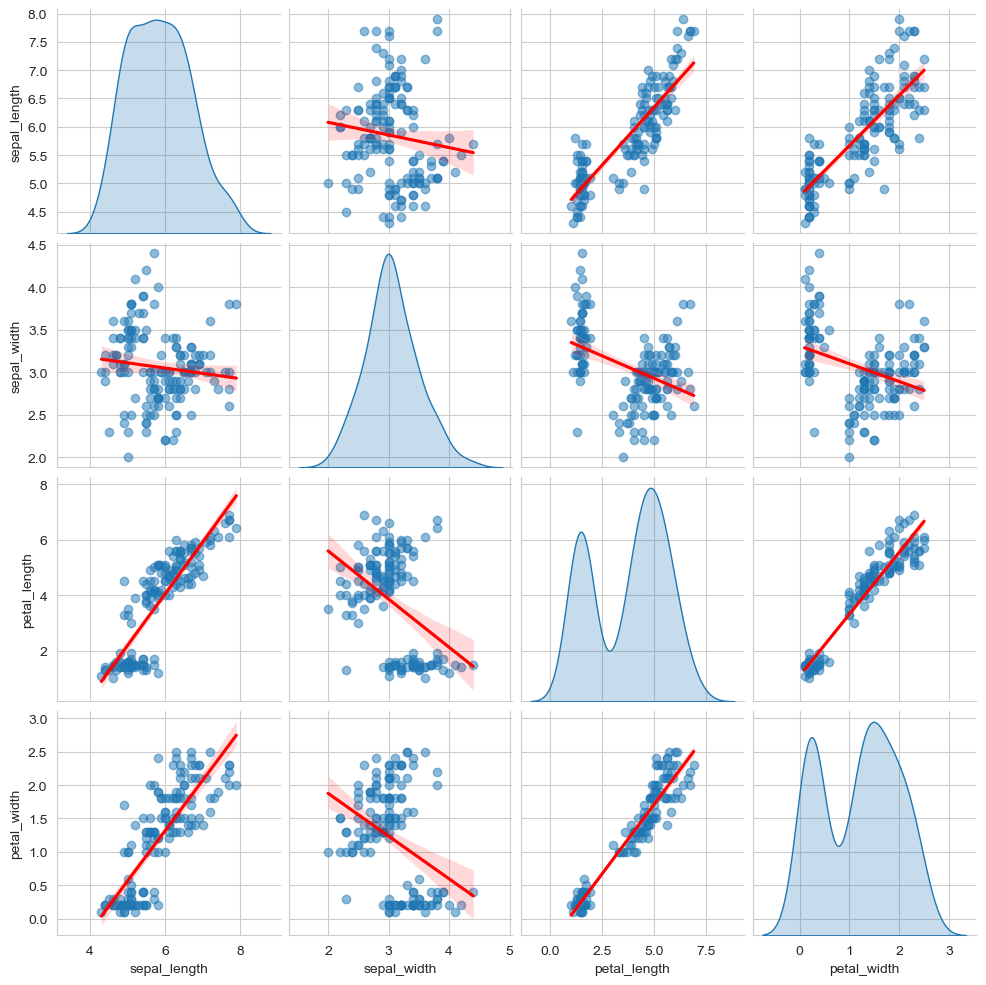

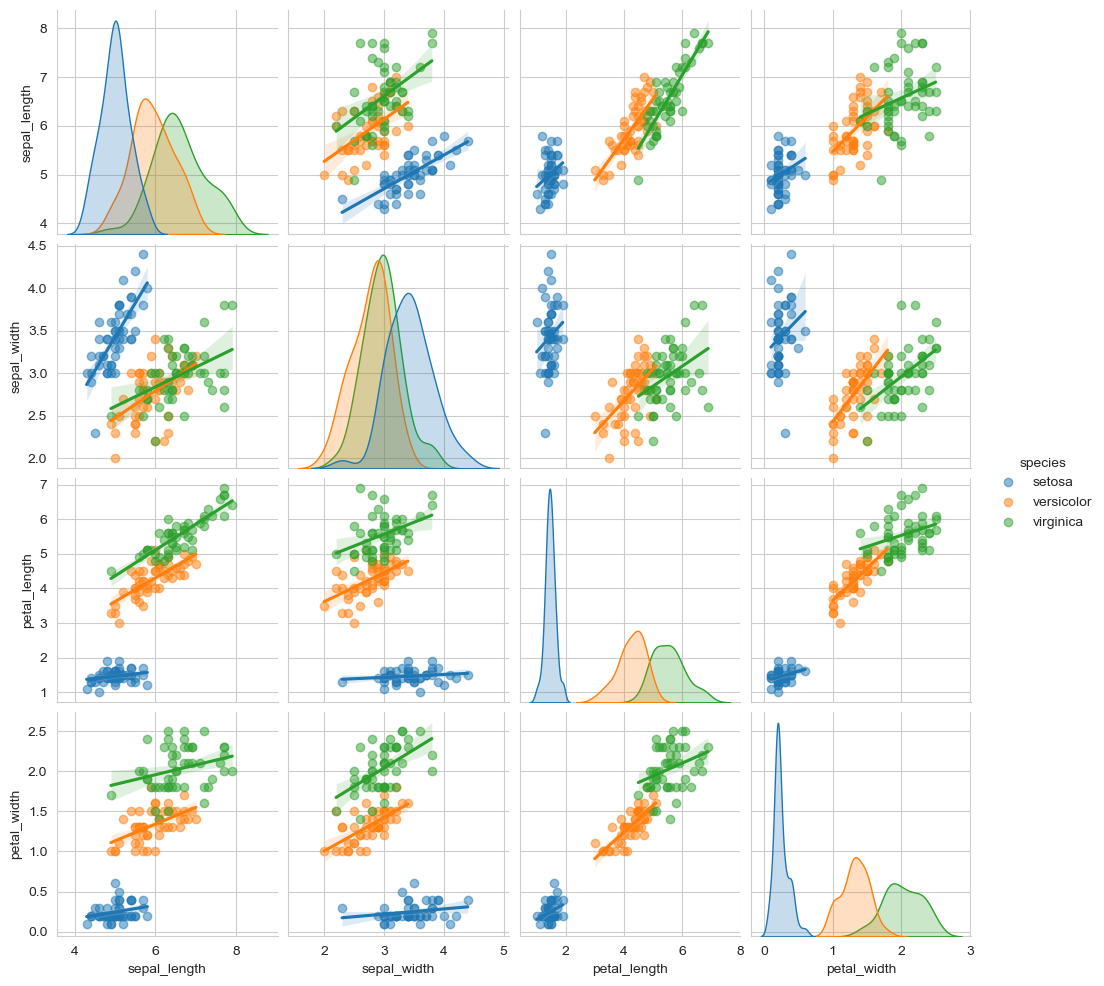

In [2]:
import seaborn as sns

# Load the iris data
iris_sns = sns.load_dataset("iris") 
# A copy from Seaborn

g = sns.pairplot(iris_sns, kind='reg', diag_kind = 'kde',
                 plot_kws={'line_kws':{'color':'red'}, 
                           'scatter_kws': {'alpha': 0.5}})
# kind='reg': 表示在非对角线上的子图中绘制回归线
# diag_kind='kde': 表示在对角线上的子图中使用核密度估计

g = sns.pairplot(iris_sns, kind='reg', diag_kind = 'kde',
                 hue="species",plot_kws={'scatter_kws': {'alpha': 0.5}})